# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

## Principais ferramentas de visualização
![principais_ferramentas_visualizacao](ferramentas_visualizacao.png)


#### Matplotlib
- Ferramenta de visualização com longa história
- Extremamente poderosa, porém muitas vezes complexo fazer certos gráficos  
Obs: o dataframe do Pandas possui integração com matplotlib, todos os exemplos dados no curso com matplotlib serão usando essa integração. [Aqui](http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html) está a documentação geral do Pandas com matplotlib 

#### Seaborn:
- Construída à partir do matplotlib  
- Gráfico com aperência e cor mais bonito que o matplotlib
- Possibilidade de escolher entre diversas paletas de cores
- Possui funcionalidades para tornar simples a criação de gráficos que seriam complexos  
[Aqui](https://seaborn.pydata.org/) está a documentação do seaborn

#### Plotly:
- Permite criar gráficos iterativos  
Obs: Foi desenvolvido uma biblioteca chamada Cufflinks que permite uma fácil interação entre o Pandas e o Plotly. Todos os exemplos nessa aula serão usando o Cufflinks, ao invés do Plotly diretamente. [Aqui](https://plot.ly/ipython-notebooks/cufflinks/) está a documentação do Cufflinks


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import os

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Dataset obtido do desafio do Kaggle: 2018 Kaggle ML & DS Survey Challenge

O Dataset foi resultado de uma abrangente pesquisa conduzida para mapear o estado da área de ciências de dados e machine learning na indústria. Essa pesquisa foi conduzida em outubro de 2018, e teve como resultado 23.859 respostas.

Os resultados incluem desde informações do que está acontecendo na área até as melhores maneiras para novos cientistas de dados entrarem no mercado. Os dados foram publicados no formato mais bruto possível sem comprometer o anonimato dos entrevistados.

Link para o desafio: <https://www.kaggle.com/kaggle/kaggle-survey-2018>.

Para facilitar a manipulação desse dataset, inicialmente ele foi processado no notebook `Processa Dataset DS Survey 2018`.

### Leitura dos dados

In [2]:
df = pd.read_csv(os.path.join("data", "ds_survey2018_processado.csv"))
print(df.shape)
df.head(2)

(23859, 9)


,current_role,data_vis_lib,prog_language,proportion_time-Gathering data,proportion_time-Cleaning data,proportion_time-Visualizing data,proportion_time-Model building/model selection,proportion_time-Putting the model into production,proportion_time-Finding insights in the data and communicating with stakeholders
0,Consultant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f"Total de usuários que responderam o questionario: {len(df)}")

Total de usuários que responderam o questionario: 23859


Qual a proporção de valores nulos em cada variável?

In [4]:
df.isna().sum(axis=0) / len(df)

current_role                                                                        0.040194
data_vis_lib                                                                        0.489333
prog_language                                                                       0.362002
proportion_time-Gathering data                                                      0.332034
proportion_time-Cleaning data                                                       0.332034
proportion_time-Visualizing data                                                    0.332034
proportion_time-Model building/model selection                                      0.332034
proportion_time-Putting the model into production                                   0.332034
proportion_time-Finding insights in the data and communicating with stakeholders    0.332034
dtype: float64

O que fazer com os valores nulos?

In [5]:
df = df.fillna('NONE')

### Visualização com gráfico de barras

Vamos ver qual o total de participantes por preferência de forma de visualização

In [6]:
count_data_vis_lib = df['data_vis_lib'].value_counts()
count_data_vis_lib

NONE          11675
Matplotlib     6707
ggplot2        2877
Seaborn        1334
Plotly          540
D3              243
Shiny           199
Other           110
Bokeh            77
Leaflet          39
Lattice          33
Altair           16
Geoplotlib        9
Name: data_vis_lib, dtype: int64

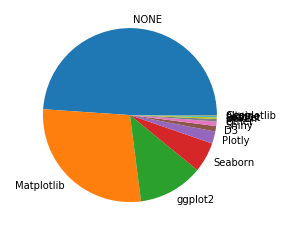

In [7]:
count_data_vis_lib.plot.pie()
pl.ylabel(' ')
pl.show()

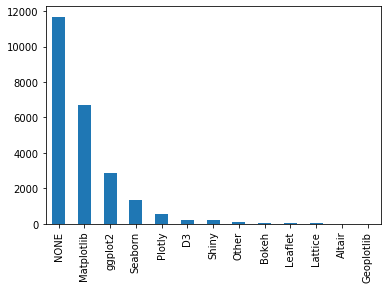

In [8]:
count_data_vis_lib.plot.bar()
pl.show()

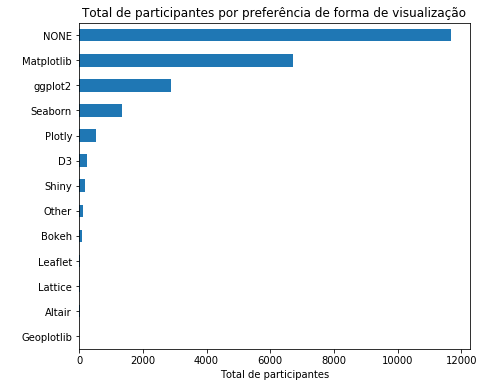

In [9]:
count_data_vis_lib[::-1].plot.barh(figsize=(7,6))
pl.title("Total de participantes por preferência de forma de visualização")
pl.xlabel("Total de participantes")
pl.ylabel(' ')
pl.show()

### Desafio 1

Usando o **visualização do pandas** construa o gráfico de barras que responda a seguinte pergunta:
- Qual o total de participantes por linguagem de programação? 

Obs: Inclua título, descrição dos eixos e cores de sua preferência. [Nesse link](https://matplotlib.org/1.5.1/examples/color/named_colors.html) está a lista completa de nomes das cores do matplotlib.

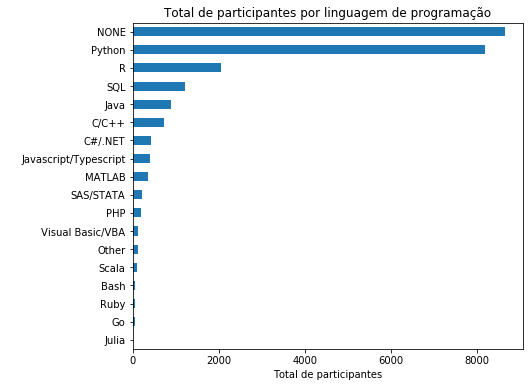

In [10]:
count_program_language = df['prog_language'].value_counts()
count_program_language[::-1].plot.barh(figsize=(7, 6))
pl.title("Total de participantes por linguagem de programação")
pl.xlabel("Total de participantes")
pl.ylabel(' ')
pl.show()

### Desafio 2

Usando o **seaborn** construa o gráfico de barras que responda a seguinte pergunta:
- Qual o total de participantes por área de atuação?

Dica: use a função [countplot do seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html). Ela faz diretamente a contagem de variáveis categóricas e plota o gráfico de barras do resultado.

Obs: Inclua títulos, descrição dos eixos e cores de sua preferência. Teste trocar a paleta de cores dos gráfico, [aqui](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial) está o guia de paletas do seaborn.

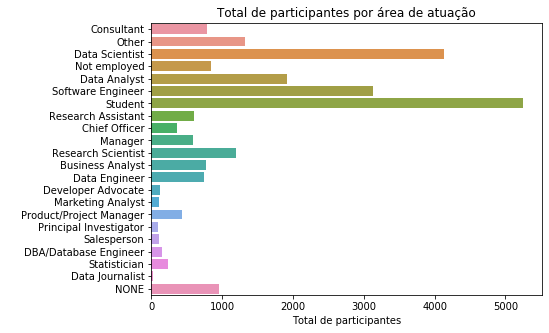

In [11]:
pl.figure(figsize=(7,5))
order_index = df['current_role'].value_counts().index
sns.countplot(y='current_role', data=df)#, order=order_index)#, palette='Blues')
pl.title("Total de participantes por área de atuação")
pl.xlabel("Total de participantes")
pl.ylabel(' ')
pl.show()

### Desafio 3

Construa um único gráfico que una os os resultados obtidos no desafio 1 e 2, mostrando esses gráficos um em baixo do outro. Para isso utilize a função [subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) do matplotlib, para criar os eixos que serão atribuídos para cada gráficos. Inclua um título único com a função [suptitle](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html).

Opcional: inclua descrição nos eixos.

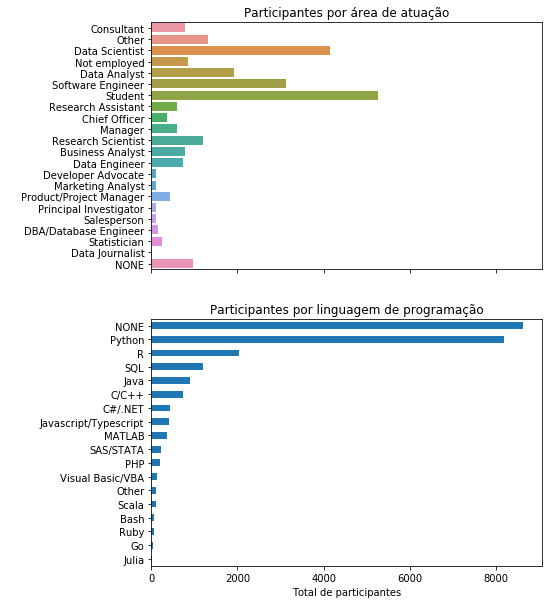

In [12]:
fig, axes = pl.subplots(nrows=2, ncols=1, figsize=(7,10), sharex=True)
# pl.subplots_adjust(wspace=0.4)
ax0 = axes[0]
ax1 = axes[1]

order_index = df['current_role'].value_counts().index
sns.countplot(y='current_role', data=df, ax=ax0)

count_program_language = df['prog_language'].value_counts()
count_program_language[::-1].plot.barh(ax=ax1)

# pl.suptitle("Total de participantes por linguagem e área de atuação")
ax0.set_title('Participantes por área de atuação')
ax1.set_title('Participantes por linguagem de programação')
ax0.set_xlabel("Total de participantes")
ax1.set_xlabel("Total de participantes")
ax0.set_ylabel(' ')
pl.show()

### Desafio 4

Usando agora o **cufflinks** faça um gráfico que mostre quais as principais forma de visualização pelos usuários de Python. Acesse [aqui](https://plot.ly/ipython-notebooks/cufflinks/#bar-charts) para exemplos de gráficos de barra com plotly.

In [13]:
count_vis_lib_python = df.loc[df['prog_language']=='Python', 'data_vis_lib'].value_counts()
count_vis_lib_python[::-1].iplot(kind='barh', xTitle='Total de participantes',
                                 title='Preferência de visualização entre os participantes que usam Python')

### Desafio 5 (EXTRA)

Usando a **visualização do pandas** e do **seaborn** construa os seguintes gráficos de barras que respondam as seguintes pergunta:
- Selecione os dados de participantes que usam Python ou R. Construa um gráficos de barras com o total de participantes por forma de visualização para programação de forma separada para as 2 linguagens, identificando na legenda a linguagem. 

Dica: Para fazer o gráfico com matplotlib semelhante ao 2º exemplo do [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html#pandas.DataFrame.plot.barh).
    

Obs: Inclua títulos, descrição dos eixos e cores de sua preferência.

In [14]:
df_sel = df[df['prog_language'].isin(['Python', 'R'])].groupby(['prog_language', 'data_vis_lib']).size()
df_sel = df_sel.reset_index().rename(columns={0: 'total'})
df_sel = pd.pivot_table(df_sel,  values='total', index='data_vis_lib', columns='prog_language')
df_sel.head()

prog_language,Python,R
data_vis_lib,,
Altair,9.0,NaN
Bokeh,53.0,2.0
D3,109.0,5.0
Geoplotlib,3.0,NaN
Lattice,6.0,14.0


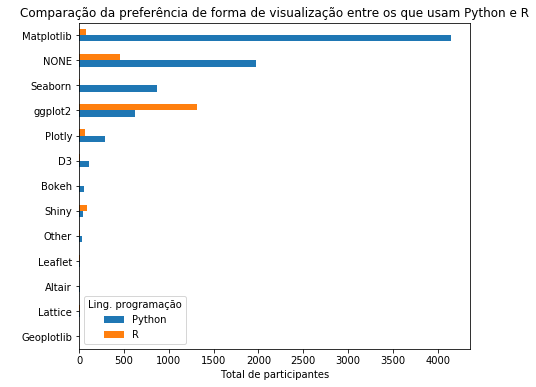

In [15]:
df_sel.sort_values(by='Python').plot.barh(figsize=(7, 6))
pl.title("Comparação da preferência de forma de visualização entre os que usam Python e R")
pl.ylabel(' ')
pl.xlabel("Total de participantes")
pl.legend(title='Ling. programação')
pl.show()

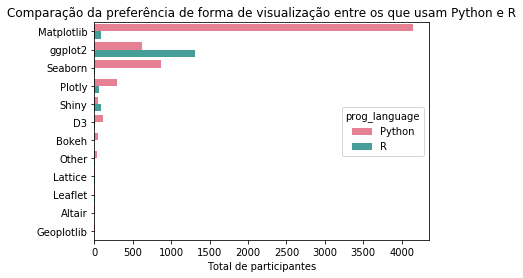

In [16]:
df_sel = df[(df['prog_language'].isin(['Python', 'R'])) & (df['data_vis_lib'] !="NONE")]
order_index = df_sel['data_vis_lib'].value_counts().index
sns.countplot(y='data_vis_lib', data=df_sel, hue='prog_language', order=order_index, palette='husl')
pl.title("Comparação da preferência de forma de visualização entre os que usam Python e R")
pl.xlabel("Total de participantes")
pl.ylabel(' ')
pl.show()

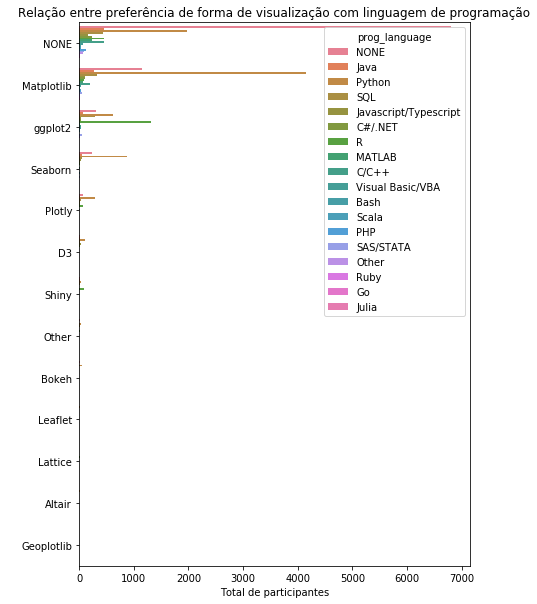

In [17]:
order_index = df['data_vis_lib'].value_counts().index
pl.figure(figsize=(7,10))
sns.countplot(y='data_vis_lib', data=df, hue='prog_language', order=order_index, palette='husl')
pl.title("Relação entre preferência de forma de visualização com linguagem de programação")
pl.xlabel("Total de participantes")
pl.ylabel(' ')
pl.show()

In [18]:
df.head()

,current_role,data_vis_lib,prog_language,proportion_time-Gathering data,proportion_time-Cleaning data,proportion_time-Visualizing data,proportion_time-Model building/model selection,proportion_time-Putting the model into production,proportion_time-Finding insights in the data and communicating with stakeholders
0,Consultant,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,Other,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,Data Scientist,ggplot2,Java,2,3,20,50,20,0
3,Not employed,ggplot2,Python,20,25,15,10,10,20
4,Data Analyst,NONE,SQL,10,10,20,10,20,23


### Visualização com heatmap

[Heatmap](https://datavizcatalogue.com/methods/heatmap.html) permite de forma rápida verificar relação entre dados multivariado.
![heatmap-examplo](heatmap-examplo.png)

In [19]:
df_resp = df[(df['prog_language'] != 'NONE') & (df['data_vis_lib'] != 'NONE')]
df_pivot = pd.pivot_table(df_resp, index='prog_language', columns='data_vis_lib', aggfunc='size')
df_pivot

data_vis_lib,Altair,Bokeh,D3,Geoplotlib,Lattice,Leaflet,Matplotlib,Other,Plotly,Seaborn,Shiny,ggplot2
prog_language,,,,,,,,,,,,
Bash,NaN,NaN,1.0,NaN,NaN,NaN,13.0,3.0,1.0,1.0,NaN,10.0
C#/.NET,NaN,NaN,8.0,NaN,NaN,2.0,113.0,4.0,8.0,17.0,NaN,39.0
C/C++,3.0,NaN,6.0,NaN,NaN,NaN,203.0,5.0,14.0,14.0,4.0,41.0
Go,1.0,NaN,3.0,NaN,NaN,NaN,18.0,2.0,NaN,4.0,NaN,2.0
Java,NaN,1.0,21.0,2.0,NaN,2.0,273.0,3.0,21.0,46.0,9.0,69.0
Javascript/Typescript,1.0,NaN,35.0,1.0,NaN,6.0,111.0,6.0,16.0,28.0,2.0,30.0
Julia,NaN,NaN,NaN,NaN,1.0,NaN,5.0,1.0,2.0,NaN,NaN,1.0
MATLAB,NaN,NaN,NaN,1.0,1.0,NaN,80.0,5.0,4.0,7.0,NaN,26.0
Other,NaN,NaN,3.0,NaN,NaN,1.0,19.0,6.0,NaN,6.0,NaN,14.0


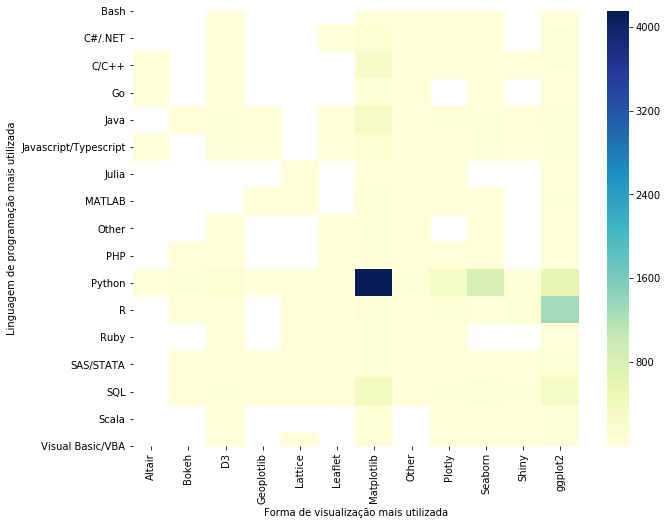

In [20]:
pl.figure(figsize=(10,8))
sns.heatmap(df_pivot, cmap="YlGnBu")
pl.ylabel('Linguagem de programação mais utilizada')
pl.xlabel('Forma de visualização mais utilizada')
pl.show()

Como o total de participantes que usam python e matplotlib é altamente predominante em relação aos outros grupos, é difícil analisar a relação existente entre os grupos minoritários. Nesse caso o ideal é fazer algum tipo de normalização. 

**Quais seriam possíveis formas de normalizar o dado?**


### Desafio 5

Refaça o [heatmap com seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html) que mostra a relação entre a profissão do participante e a ferramente de visualização mais utilizada, aplicando o logarítimo 

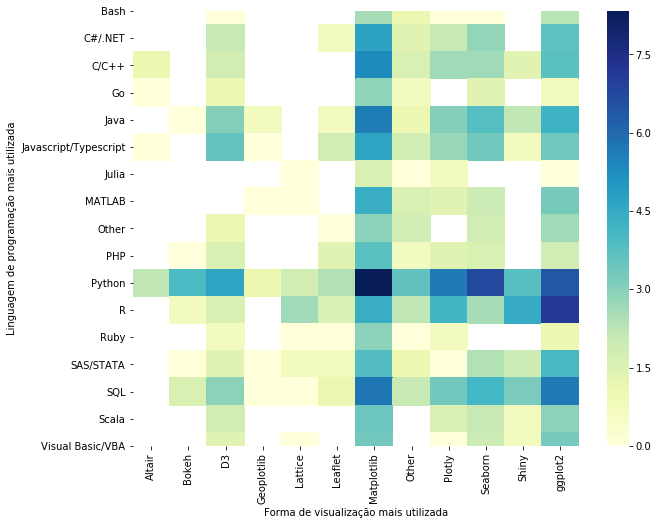

In [21]:
pl.figure(figsize=(10,8))
sns.heatmap(np.log(df_pivot), cmap="YlGnBu")
pl.ylabel('Linguagem de programação mais utilizada')
pl.xlabel('Forma de visualização mais utilizada')
pl.show()